In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
import re
import nltk.data
import nltk
from collections import OrderedDict
from subprocess import check_call
from shutil import copyfile
%matplotlib inline
import matplotlib.pyplot as plt
eng_stopwords = set(stopwords.words("english"))
import string

In [76]:
trn = pd.read_csv('./train.csv', encoding = 'utf-8')
tst = pd.read_csv('./test_x.csv', encoding = 'utf-8')

/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-pac

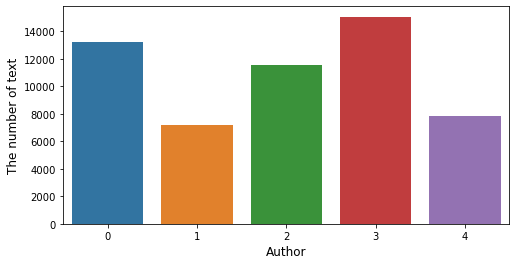

In [77]:
trn_graph = trn['author'].value_counts()
color = sns.color_palette()

plt.figure(figsize=(8,4))
sns.barplot(trn_graph.index, trn_graph.values)
plt.ylabel('The number of text', fontsize=12)
plt.xlabel('Author', fontsize=12)
plt.show()

/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(

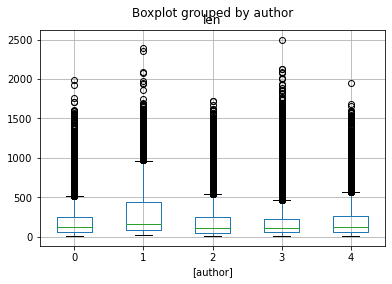

In [78]:
#단순히 길이로만 boxplot 형태 확인(이상치를 단순히 길이로 잡는건 잘못된 생각)
trn['len'] = trn['text'].apply(len)
trn.boxplot(column = ["len"], by = ["author"])
plt.show()

In [79]:
trn = trn.drop(['len'], axis=1)

In [80]:
#문장으로부터 pure word를 추출
def clean(trn,tst):
    trn['words'] = [re.sub("[^a-zA-Z]"," ", data).lower().split() for data in trn['text']]
    tst['words'] = [re.sub("[^a-zA-Z]"," ", data).lower().split() for data in tst['text']]
    return trn,tst
trn, tst = clean(trn, tst)

In [81]:
#각 저자마다 좋아하는 구두점을 추출
punctuations = [{"id":1,"p":"[;:]"},{"id":2,"p":"[,.]"},{"id":3,"p":"[?]"},{"id":4,"p":"[\']"},{"id":5,"p":"[\"]"},{"id":6,"p":"[;:,.?\'\"]"}]
for p in punctuations:
    punctuation = p["p"]
    temp_trn =  [ sentence.split() for sentence in trn['text'] ]
    trn['punc_'+str(p["id"])] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in temp_trn]    
    temp_tst =  [ sentence.split() for sentence in tst['text'] ]
    tst['punc_'+str(p["id"])] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in temp_tst]

In [82]:
#각 문장의 stopword 비율을 추출
#0으로 나뉘어지는 경우는 전체 길이에 각각 1을 더해서 해결
stop_trn = [x for x in trn['words']]
trn['stop_word'] = [len([word for word in sentence if word in stopwords.words('english')])*100.0/(len(sentence)+1) for sentence in stop_trn]

stop_tst = [x for x in tst['words']]
tst['stop_word'] = [len([word for word in sentence if word in stopwords.words('english')])*100.0/(len(sentence)+1) for sentence in stop_tst] 


In [83]:
## 비율
trn["num_words"] = trn["text"].apply(lambda x: len(str(x).split()))
tst["num_words"] = tst["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
trn["num_unique_words"] = trn["text"].apply(lambda x: len(set(str(x).split())))
tst["num_unique_words"] = tst["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
trn["num_chars"] = trn["text"].apply(lambda x: len(str(x)))
tst["num_chars"] = tst["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
trn["num_stopwords"] = trn["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
tst["num_stopwords"] = tst["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
trn["num_punctuations"] = trn['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
tst["num_punctuations"] = tst['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
trn["num_words_upper"] = trn["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
tst["num_words_upper"] = tst["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
trn["num_words_title"] = trn["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
tst["num_words_title"] = tst["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
trn["mean_word_len"] = trn["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
tst["mean_word_len"] = tst["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [84]:
trn.head(5)

,index,text,author,words,punc_1,punc_2,punc_3,punc_4,punc_5,punc_6,stop_word,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len
0,0,"He was almost choking. There was so much, so m...",3,"[he, was, almost, choking, there, was, so, muc...",2.173913,15.217391,0.000000,0.000000,0.0,17.391304,55.319149,46,39,240,0,4,4.239130
1,1,"“Your sister asked for it, I suppose?”",2,"[your, sister, asked, for, it, i, suppose]",0.000000,14.285714,14.285714,0.000000,0.0,28.571429,50.000000,7,7,38,1,2,4.571429
2,2,"She was engaged one day as she walked, in per...",1,"[she, was, engaged, one, day, as, she, walked,...",1.754386,14.035088,0.000000,0.000000,0.0,15.789474,49.152542,57,50,320,0,4,4.614035
3,3,"The captain was in the porch, keeping himself ...",4,"[the, captain, was, in, the, porch, keeping, h...",3.448276,25.862069,0.000000,1.724138,0.0,31.034483,46.666667,58,49,319,0,7,4.517241
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3,"[have, mercy, gentlemen, odin, flung, up, his,...",2.564103,17.948718,0.000000,0.000000,0.0,20.512821,54.761905,39,36,228,0,4,4.871795


In [85]:
tst.head(5)

,index,text,words,punc_1,punc_2,punc_3,punc_4,punc_5,punc_6,stop_word,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len
0,0,“Not at all. I think she is one of the most ch...,"[not, at, all, i, think, she, is, one, of, the...",1.123596,8.988764,0.000000,0.0,0.000000,10.112360,58.888889,89,68,456,5,9,4.134831
1,1,"""No,"" replied he, with sudden consciousness, ""...","[no, replied, he, with, sudden, consciousness,...",2.325581,20.930233,0.000000,0.0,6.976744,25.581395,65.957447,43,36,221,5,5,4.162791
2,2,As the lady had stated her intention of scream...,"[as, the, lady, had, stated, her, intention, o...",3.125000,12.500000,0.000000,0.0,0.000000,15.625000,50.769231,64,55,375,0,2,4.875000
3,3,“And then suddenly in the silence I heard a so...,"[and, then, suddenly, in, the, silence, i, hea...",0.416667,10.833333,0.416667,0.0,0.000000,11.666667,53.526971,240,150,1218,11,21,4.079167
4,4,His conviction remained unchanged. So far as I...,"[his, conviction, remained, unchanged, so, far...",0.000000,9.890110,0.000000,0.0,0.000000,9.890110,54.255319,91,71,510,4,8,4.615385


In [86]:
trn.to_csv("my_train.csv")
tst.to_csv("my_test.csv")